In [1]:
import sys
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pandas

     ---------------------------------------- 2.1/2.1 MB 6.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.1.2
    Uninstalling pip-22.1.2:
      Successfully uninstalled pip-22.1.2
     ---------------------------------------- 8.3/8.3 MB 10.6 MB/s eta 0:00:00
     ------------------------------------ 298.0/298.0 kB 472.5 kB/s eta 0:00:00
     ---------------------------------------- 11.3/11.3 MB 8.8 MB/s eta 0:00:00
     -------------------------------------- 502.3/502.3 kB 1.1 MB/s eta 0:00:00
     -------------------------------------- 341.8/341.8 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 14.9/14.9 MB 8.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires numpy~=1.19.2, but you have numpy 1.24.2 which is incompatible.


## KNN

## CHATGPT prompts: "code a KNN python implementation ready to test and train"

## CHATGPT result:

In [2]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k=5):
        self.k = k
    
    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
    
    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # Return the most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]
    
    def predict_proba(self, X_test):
        probs = []
        for x in X_test:
            distances = np.sqrt(np.sum((self.X_train - x)**2, axis=1))
            k_nearest = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[k_nearest]
            counts = np.bincount(k_nearest_labels)
            prob = counts / self.k
            probs.append(prob[1])  # Only return probability of positive class
        return np.array(probs)
    

c:\Users\tgvm1\miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\tgvm1\miniconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\tgvm1\miniconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## CHATGPT prompt: "now give other results such as confusio matrice, f-score, precision, recall and ROC"

## CHATGPT result:

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN model on the training set
knn = KNN(k=5)
knn.fit(X_train, y_train)

# Test the model on the test set
y_pred = knn.predict(X_test)

# Evaluate the accuracy of the model
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

# Calculate the classification report
cr = classification_report(y_test, y_pred)
print("Classification report:\n", cr)

# Calculate the ROC curve
y_proba = knn.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1], pos_label=2)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Matplotlib is building the font cache; this may take a moment.


Accuracy: 1.0
Confusion matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



IndexError: index 1 is out of bounds for axis 0 with size 1

## Relatório KNN:



## Naive Bayes

## CHATGPT prompts: "code a Naive Bayes python implementation ready to test and train"

## CHATGPT result:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('data.csv')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

# Vectorize input data
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# Predict on testing set and evaluate accuracy
y_pred = clf.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute and print confusion matrix, classification report, and ROC-AUC score
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, clf.predict_proba(X_test_vec)[:, 1]))

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test_vec)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Plot precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test_vec)[:, 1])
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

Arvore de decisão

ChatGPT prompt: "code a decision tree implementation in python ready to test and train for the "titanic" dataset"

ChatGPT result:

In [4]:
#Sure! Here's an implementation of a decision tree for the Titanic dataset using the scikit-learn library in Python. This implementation includes data cleaning, feature engineering, and model training.

#First, let's start by importing the necessary libraries:

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#Next, let's load the Titanic dataset into a pandas dataframe and do some basic cleaning:

df = pd.read_csv('train.csv')         #nesta linha foi alterado o nome do arquivo de 'titanic.csv' para 'train.csv'

# Drop irrelevant columns
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Replace missing values in 'Age' column with median
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

# Replace missing values in 'Embarked' column with most common value
most_common_embarked = df['Embarked'].value_counts().index[0]
df['Embarked'] = df['Embarked'].fillna(most_common_embarked)


#Now, let's do some feature engineering by creating a new column 'FamilySize' which combines the 'SibSp' and 'Parch' columns:

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


#We'll also create a new column 'IsAlone' which is 1 if the passenger is traveling alone (i.e. has no family members on board) and 0 otherwise:

df['IsAlone'] = df['FamilySize'].apply(lambda x: 1 if x == 1 else 0)


#Now we'll create dummy variables for the 'Sex' and 'Embarked' columns:

df = pd.get_dummies(df, columns=['Sex', 'Embarked'])


#Finally, we'll split the data into training and testing sets and train the decision tree model:

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


#In this implementation, we've used a decision tree with a maximum depth of 3. You can experiment with different values for the maximum depth to see how it affects the accuracy of the model.

#I hope this helps!

Accuracy: 0.7988826815642458


## CHATGPT prompt: "now give other results such as confusio matrice, f-score, precision, recall and ROC"

## CHATGPT result:


Confusion matrix:
 [[92 13]
 [23 51]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

AUC score: 0.8463320463320464


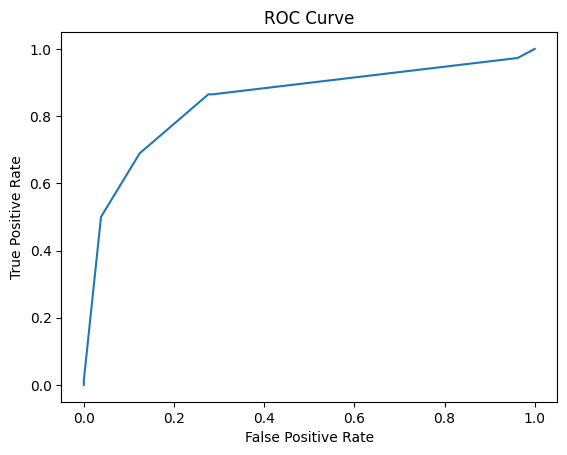

In [5]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score


print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot ROC curve and calculate AUC score
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)
print('AUC score:', auc_score)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## Relatório Árvore de decisão:

